# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datatypes

In [ ]:
df = pd.read_csv('data/spotify-features_adjusted.csv', sep=';', low_memory=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  object 
 5   acousticness      232725 non-null  object 
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  object 
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  object 
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
continuous_features = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categorical_features = ['key', 'mode', 'time_signature']

df[continuous_features] = df[continuous_features].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232723 non-null  float64
 5   acousticness      232724 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232724 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232724 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
print(df.shape)
df.describe()

(232725, 18)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232723.000000,232724.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232724.000000,232725.000000,232724.000000,232725.000000,232725.000000
mean,41.127641,0.368559,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189911,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185519,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037575,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


## Duplicates

In [ ]:
num_duplicates = df.duplicated(subset='track_id').sum()
print(f"Number of duplicate rows based on track_id: {num_duplicates}")

Number of duplicate rows based on track_id: 55951


In [ ]:
df = df.drop_duplicates(subset='track_id')

print(df.shape)
df.describe()

(176774, 18)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,176772.00000,176773.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176773.000000,176774.000000,176773.000000,176774.000000,176774.000000
mean,36.27329,0.404133,0.541068,2.361272e+05,0.557025,0.172073,0.224531,-10.137605,0.127396,117.203679,0.451595
std,17.39100,0.366302,0.190387,1.305132e+05,0.275839,0.322936,0.211028,6.395551,0.204345,31.325091,0.267820
min,0.00000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,25.00000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,0.097500,-12.851000,0.036800,92.006000,0.222000
50%,37.00000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,0.130000,-8.191000,0.049400,115.006500,0.440000
75%,49.00000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,0.277000,-5.631000,0.102000,138.799750,0.667000
max,100.00000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


## Missing Values

In [ ]:
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

print(df.shape)
df.describe()

(176768, 18)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,176768.000000,176768.000000,176768.000000,1.767680e+05,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000
mean,36.273749,0.404124,0.541073,2.361276e+05,0.557036,0.172079,0.224534,-10.137503,0.127399,117.203191,0.451601
std,17.390759,0.366298,0.190387,1.305149e+05,0.275836,0.322940,0.211030,6.395609,0.204348,31.325382,0.267820
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,0.097500,-12.850000,0.036800,92.005750,0.222000
50%,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000071,0.130000,-8.191000,0.049400,115.006000,0.440000
75%,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090825,0.277000,-5.631000,0.102000,138.799250,0.667000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


## Feature-specific Cleaning

### Genre

In [ ]:
print(df['genre'].unique())

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


In [ ]:
# Remove Opera and Comedy genres
df = df[~df['genre'].isin(['Opera', 'Comedy'])]

# Merge both children's genres into a single label
df['genre'] = df['genre'].replace({'Children’s Music': 'Children', "Children's Music": 'Children'})

print(df.shape)
df.describe()

(158814, 18)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,158814.000000,158814.000000,158814.000000,1.588140e+05,158814.000000,158814.000000,158814.000000,158814.000000,158814.000000,158814.000000,158814.000000
mean,38.380539,0.352199,0.553036,2.349745e+05,0.570021,0.179401,0.194108,-9.562988,0.086661,119.162720,0.467620
std,16.826157,0.347788,0.189109,1.179577e+05,0.268961,0.328244,0.168489,6.131850,0.098469,30.972612,0.267865
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,28.000000,0.034000,0.429000,1.813962e+05,0.376000,0.000000,0.095700,-11.744000,0.036000,94.323000,0.241000
50%,39.000000,0.215000,0.571000,2.200270e+05,0.606000,0.000097,0.124000,-7.724000,0.047700,117.941000,0.463000
75%,50.000000,0.669000,0.696000,2.664670e+05,0.793000,0.122000,0.238000,-5.442000,0.088100,140.007000,0.686000
max,100.000000,0.996000,0.989000,5.488000e+06,0.999000,0.999000,1.000000,3.744000,0.965000,242.903000,1.000000


### Time Signature

In [ ]:
df['time_signature'].value_counts()

time_signature
4/4    139555
3/4     14914
5/4      2874
1/4      1469
0/4         2
Name: count, dtype: int64

In [ ]:
df = df[~df['time_signature'].isin(['0/4', '1/4'])]
print(df.shape)
df.describe()

(157343, 18)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,157343.000000,157343.000000,157343.000000,1.573430e+05,157343.000000,157343.000000,157343.000000,157343.000000,157343.000000,157343.000000,157343.000000
mean,38.447989,0.349203,0.554619,2.352167e+05,0.572408,0.177342,0.194251,-9.500581,0.086562,119.272349,0.469231
std,16.809739,0.346431,0.188370,1.172397e+05,0.267835,0.326627,0.168523,6.071264,0.097786,30.963337,0.267461
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,28.000000,0.033500,0.431000,1.817730e+05,0.380000,0.000000,0.095700,-11.658000,0.036000,94.541500,0.243000
50%,39.000000,0.211000,0.572000,2.202270e+05,0.609000,0.000093,0.124000,-7.688000,0.047700,117.992000,0.465000
75%,50.000000,0.661000,0.696000,2.665600e+05,0.794000,0.112000,0.238000,-5.429000,0.088300,140.013000,0.687000
max,100.000000,0.996000,0.989000,5.488000e+06,0.999000,0.999000,1.000000,3.744000,0.965000,242.903000,1.000000


## Outlier Detection

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

In [ ]:
X = df[continuous_features + categorical_features]
print(X.shape)

(157343, 13)


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

X_transformed = preprocessor.fit_transform(X)

In [ ]:
iso_forest = IsolationForest(contamination=0.1, random_state=1)
outliers = iso_forest.fit_predict(X_transformed)

num_outliers = np.sum(outliers == -1)
print(f"Number of outliers detected: {num_outliers}")

Number of outliers detected: 15735


In [ ]:
pca2D = PCA(n_components=2)
X_pca2D = pca2D.fit_transform(X_transformed)
pca2D_var = pca2D.explained_variance_ratio_

Explained variance by 2D PCA: 42.19%


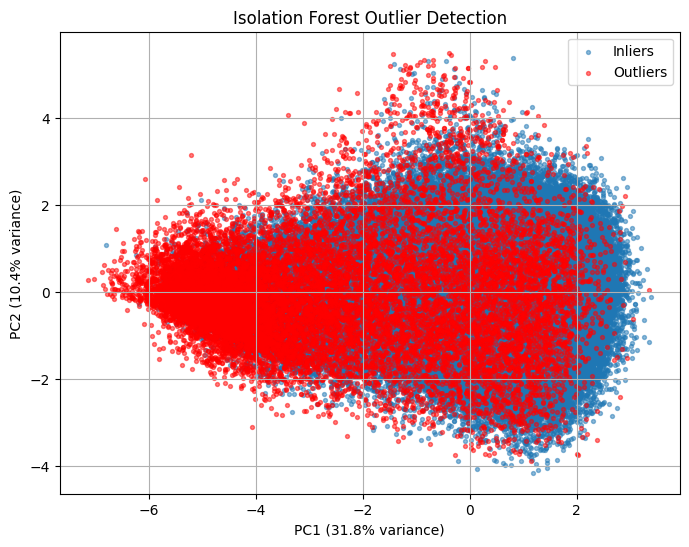

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca2D[outliers == 1, 0],
    X_pca2D[outliers == 1, 1],
    label="Inliers",
    alpha=0.5,
    s=8
)
plt.scatter(
    X_pca2D[outliers == -1, 0],
    X_pca2D[outliers == -1, 1],
    color="red",
    label="Outliers",
    alpha=0.5,
    s=8
)
plt.title("Isolation Forest Outlier Detection")
plt.xlabel(f"PC1 ({pca2D_var[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca2D_var[1]*100:.1f}% variance)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_cleaned = df[outliers == 1].reset_index(drop=True)
print(df_cleaned.shape)
df_cleaned.describe()

(141608, 18)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,141608.000000,141608.000000,141608.000000,1.416080e+05,141608.000000,141608.000000,141608.000000,141608.000000,141608.000000,141608.000000,141608.000000
mean,39.388410,0.310733,0.575515,2.353850e+05,0.604300,0.141738,0.193975,-8.581267,0.085260,120.062937,0.491315
std,16.459702,0.324155,0.174624,1.074579e+05,0.247212,0.294131,0.165811,4.826957,0.089626,30.168961,0.258927
min,0.000000,0.000000,0.057000,1.538700e+04,0.000243,0.000000,0.009670,-52.457000,0.022200,31.689000,0.000000
25%,29.000000,0.028000,0.461000,1.849200e+05,0.433000,0.000000,0.095800,-10.613000,0.035700,95.224750,0.280000
50%,40.000000,0.175000,0.589000,2.212000e+05,0.636000,0.000047,0.126000,-7.324000,0.048600,119.007500,0.491000
75%,50.000000,0.558000,0.706000,2.657600e+05,0.807000,0.031300,0.241000,-5.278750,0.090225,140.036000,0.701000
max,100.000000,0.996000,0.989000,5.488000e+06,0.999000,0.998000,1.000000,3.744000,0.962000,236.799000,1.000000


In [ ]:
df_cleaned.to_csv('data/spotify-features_cleaned.csv', index=False)